<a href="https://colab.research.google.com/github/cmgpcinthia/Big_Data_Machine_Learning/blob/main/10_Clase18NTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Exploratorio y Modelos Predictivos


##Dataset TITANIC

In [ ]:
for i in range (101):
    if (i%7 == 0) or (i%2 == 0):
      print (i)


0
2
4
6
7
8
10
12
14
16
18
20
21
22
24
26
28
30
32
34
35
36
38
40
42
44
46
48
49
50
52
54
56
58
60
62
63
64
66
68
70
72
74
76
77
78
80
82
84
86
88
90
91
92
94
96
98
100


In [ ]:
for i in range (1001):
 if "7" in str(i):
  print (i)

7
17
27
37
47
57
67
70
71
72
73
74
75
76
77
78
79
87
97
107
117
127
137
147
157
167
170
171
172
173
174
175
176
177
178
179
187
197
207
217
227
237
247
257
267
270
271
272
273
274
275
276
277
278
279
287
297
307
317
327
337
347
357
367
370
371
372
373
374
375
376
377
378
379
387
397
407
417
427
437
447
457
467
470
471
472
473
474
475
476
477
478
479
487
497
507
517
527
537
547
557
567
570
571
572
573
574
575
576
577
578
579
587
597
607
617
627
637
647
657
667
670
671
672
673
674
675
676
677
678
679
687
697
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
807
817
827
837
847
857
867
870
871
872
873
874
875
876
877
878
879
887
897
907
917
927


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
titanictrain = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/train.csv")

In [ ]:
titanictrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='count'>

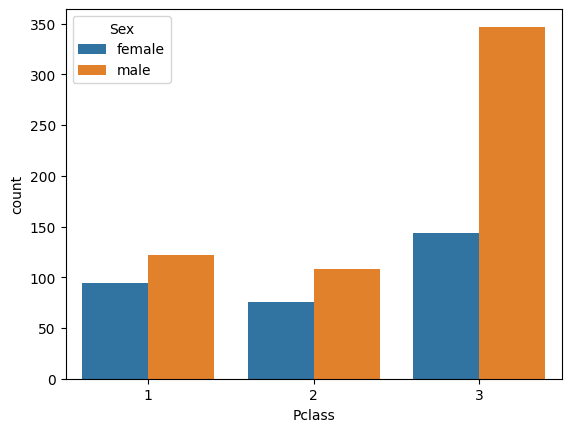

In [ ]:
sns.countplot(x=titanictrain.Pclass , hue=titanictrain.Sex)

<Axes: xlabel='Age', ylabel='Count'>

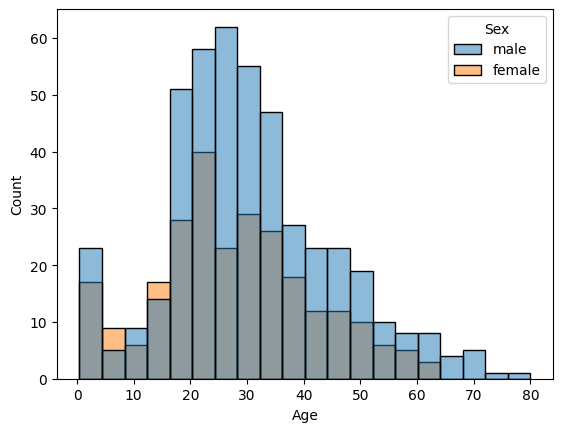

In [ ]:
sns.histplot(x=titanictrain.Age, hue=titanictrain.Sex)

<Axes: xlabel='Age', ylabel='Embarked'>

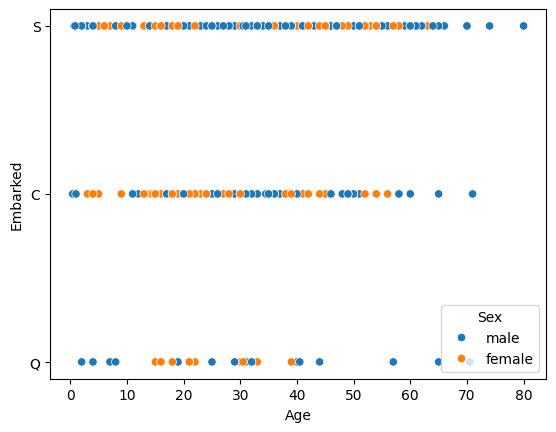

In [ ]:
sns.scatterplot(x=titanictrain.Age,y= titanictrain.Embarked , hue=titanictrain.Sex)

In [ ]:
titanictrain.shape

(891, 12)

In [ ]:
titanictrainSex = titanictrain[["Sex","Survived"]]

In [ ]:
titanictrainSex.head(3)

,Sex,Survived
0,male,0
1,female,1
2,female,1


In [ ]:
titanictrainSex['SexNum'] = titanictrainSex.Sex.map({'male':1, 'female':0})

/tmp/ipython-input-3948194155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanictrainSex['SexNum'] = titanictrainSex.Sex.map({'male':1, 'female':0})


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(
    X=titanictrainSex[["SexNum"]],
    y=titanictrainAge.Survived
)

LogisticRegression()

In [ ]:
titanictrainSex["prediction_Survives"] = log.predict(titanictrainSex[["SexNum"]])

/tmp/ipython-input-1709033556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanictrainSex["prediction_Survives"] = log.predict(titanictrainSex[["SexNum"]])


In [ ]:
titanictrainSex.sample(5)

,Sex,Survived,SexNum,prediction_Survives
536,male,0,1,0
208,female,1,0,1
868,male,0,1,0
229,female,0,0,1
72,male,0,1,0


In [ ]:
titanictrainSex["is_correct"] = titanictrainSex.Survived == titanictrainSex.prediction_Survives

/tmp/ipython-input-4033875813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanictrainSex["is_correct"] = titanictrainSex.Survived == titanictrainSex.prediction_Survives


In [ ]:
titanictrainSex.sample(5)

,Sex,Survived,SexNum,prediction_Survives,is_correct
100,female,0,0,1,False
424,male,0,1,0,True
5,male,0,1,0,True
880,female,1,0,1,True
629,male,0,1,0,True


In [ ]:
accuracy = (titanictrainSex.is_correct.sum() / titanictrainSex.shape[0]).round(3)

In [ ]:
accuracy

np.float64(0.787)

In [ ]:
round(titanictrainSex.is_correct.mean(), 3)

np.float64(0.787)

con el 80/20

In [ ]:
X = titanictrainSex[["SexNum"]]
y = titanictrainSex.Survived

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((712, 1), (179, 1))

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(
    X_train,
    y_train
)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
titanictrainSex["prediction_Survives8020"] = log.predict(titanictrainSex[["SexNum"]])

/tmp/ipython-input-2492174248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanictrainSex["prediction_Survives8020"] = log.predict(titanictrainSex[["SexNum"]])


In [ ]:
titanictrainSex.head()

,Sex,Survived,SexNum,prediction_Survives,is_correct,prediction_Survives8020
0,male,0,1,0,True,0
1,female,1,0,1,True,1
2,female,1,0,1,True,1
3,female,1,0,1,True,1
4,male,0,1,0,True,0


In [ ]:
round(accuracy_score(y_train, log.predict(X_train)), 3)

0.788

In [ ]:
round(accuracy_score(y_test, log.predict(X_test)), 3)

0.782

In [ ]:
titanictest = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/test.csv")

In [ ]:
titanictest['SexNum'] = titanictest['Sex'].map({'male':1, 'female':0})

In [ ]:
titanictest["Survived"] = log.predict(titanictest[["SexNum"]])

In [ ]:
titanictest.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNum,prediction_Survives,Survives,Survived
289,1181,3,"Ford, Mr. Arthur",male,NaN,0,0,A/5 1478,8.050,NaN,S,1,0,0,0
129,1021,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.050,NaN,S,1,0,0,0
237,1129,3,"Baccos, Mr. Raffull",male,20.0,0,0,2679,7.225,NaN,C,1,0,0,0
136,1028,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,1,0,0,0
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C,1,0,0,0


In [ ]:
titanictest.Sex.value_counts()

,count
Sex,
male,266
female,152


In [ ]:
titanictestresoults = titanictest[["PassengerId", "Survived"]]

In [ ]:
titanictestresoults.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
titanictestresoults.to_csv("titanictestresoults.csv", index=False)

In [ ]:
titanictrain = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/train.csv")

In [ ]:
titanictrain["Sex"] = titanictrain.Sex.map({'male':1, 'female':0})

In [ ]:
titanictrain.Age = titanictrain.Age.fillna(titanictrain.Age.median())

In [ ]:
titanictrain["Embarked"] = titanictrain.Embarked.map({'S':1, 'C':2, "Q":3})

In [ ]:
titanictrain.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


In [ ]:
titanictrain["Cabin"] = titanictrain["Cabin"].str[0]
titanictrain["Cabin"] = titanictrain["Cabin"].replace({
    "A": 1, "B": 1, "C": 1,
    "D": 2, "E": 2, "F": 2,
    "G": 3, "T": 3
})


/tmp/ipython-input-2920609877.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanictrain["Cabin"] = titanictrain["Cabin"].replace({


In [ ]:
titanictrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = titanictrain.drop(["Survived","Name","Ticket"], axis=1)

In [ ]:
y = titanictrain.Survived

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=4)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
titanictest = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/test.csv")

In [ ]:
titanictest["Sex"] = titanictest.Sex.map({'male':1, 'female':0})

In [ ]:
titanictest.Age = titanictest.Age.fillna(titanictest.Age.median())

In [ ]:
titanictest["Embarked"] = titanictest.Embarked.map({'S':1, 'C':2, "Q":3})

In [ ]:
titanictest["Cabin"] = titanictest["Cabin"].str[0]
titanictest["Cabin"] = titanictest["Cabin"].replace({
    "A": 1, "B": 1, "C": 1,
    "D": 2, "E": 2, "F": 2,
    "G": 3, "T": 3
})

/tmp/ipython-input-3792254233.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanictest["Cabin"] = titanictest["Cabin"].replace({


In [ ]:
titanictest.drop(["Name","Ticket"], axis=1, inplace=True)

In [ ]:
titanictest

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,NaN,3
1,893,3,0,47.0,1,0,7.0000,NaN,1
2,894,2,1,62.0,0,0,9.6875,NaN,3
3,895,3,1,27.0,0,0,8.6625,NaN,1
4,896,3,0,22.0,1,1,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,NaN,1
414,1306,1,0,39.0,0,0,108.9000,1.0,2
415,1307,3,1,38.5,0,0,7.2500,NaN,1
416,1308,3,1,27.0,0,0,8.0500,NaN,1


In [ ]:
model.predict(titanictest).sum()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cabin


In [ ]:
titanictest["Survived"] = model.predict(titanictest)

In [ ]:
titanictest.Survived = titanictest.Survived

In [ ]:
titanictest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.5,0,0,7.8292,3,0
1,893,3,0,47.0,1,0,7.0000,1,0
2,894,2,1,62.0,0,0,9.6875,3,0
3,895,3,1,27.0,0,0,8.6625,1,0
4,896,3,0,22.0,1,1,12.2875,1,0


In [ ]:
submission = titanictest[["PassengerId", "Survived"]]

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
submission.to_csv("titanictestresoults20NovDepth5.csv", index=False)

In [ ]:
round(root_mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test),
), 3)

0.362

In [ ]:
from sklearn.tree import plot_tree

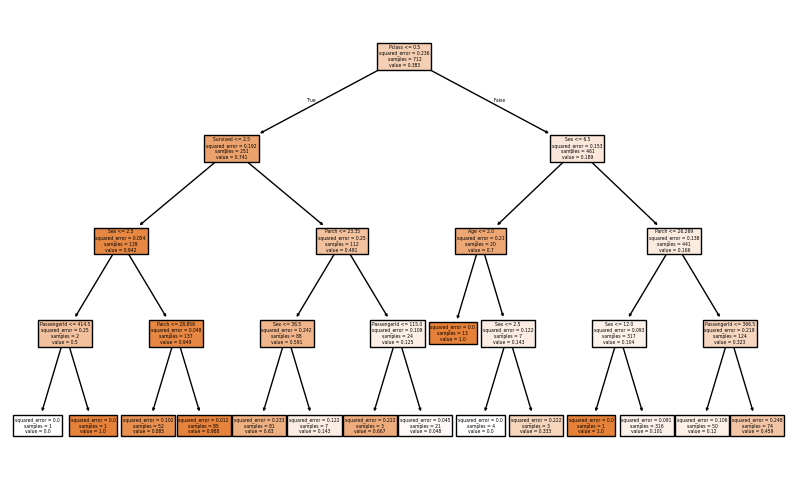

In [ ]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=titanictrain.columns[:-1], filled=True);

In [ ]:
results = []

for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    result = {
        "model": model,
        "depth": depth,
        "train_error": root_mean_squared_error(y_train, model.predict(X_train)),
        "test_error": root_mean_squared_error(y_test, model.predict(X_test))
    }

    results.append(result)

In [ ]:
results_titanictrain = pd.DataFrame(results).round(3)

In [ ]:
results_titanictrain

,model,depth,train_error,test_error
0,DecisionTreeRegressor(max_depth=1),1,0.408,0.408
1,DecisionTreeRegressor(max_depth=2),2,0.376,0.386
2,DecisionTreeRegressor(max_depth=3),3,0.353,0.363
3,DecisionTreeRegressor(max_depth=4),4,0.337,0.362
4,DecisionTreeRegressor(max_depth=5),5,0.323,0.371
5,DecisionTreeRegressor(max_depth=6),6,0.309,0.373
6,DecisionTreeRegressor(max_depth=7),7,0.281,0.407
7,DecisionTreeRegressor(max_depth=8),8,0.250,0.419
8,DecisionTreeRegressor(max_depth=9),9,0.224,0.426
9,DecisionTreeRegressor(max_depth=10),10,0.178,0.480


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [4, 5, 6],
        "min_samples_split": [10, 20, 30, 50],
    },
    cv=5,
    verbose=1,
    scoring="neg_root_mean_squared_error",
    return_train_score=True
)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_split': [10, 20, 30, 50]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [ ]:
grid_search_results = pd.DataFrame(gs.cv_results_)

grid_search_results = grid_search_results[['param_max_depth', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [ ]:
grid_search_results.sort_values("mean_test_score", ascending=False)

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,4,10,-0.371402,-0.336728
3,4,50,-0.371740,-0.345694
7,5,50,-0.372414,-0.339288
1,4,20,-0.373341,-0.343195
2,4,30,-0.373474,-0.344163
11,6,50,-0.375004,-0.336618
6,5,30,-0.381326,-0.334416
5,5,20,-0.383253,-0.331865
4,5,10,-0.383709,-0.321040
10,6,30,-0.389463,-0.324359


Max Depth 4 Min Samples Split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(
    X=titanictrain[["Sex", "Age", "Fare"]],
    y=titanictrain.Survived
)

LogisticRegression()

In [ ]:
titanictrain["Survived_Prediction"] = log.predict(titanictrain[["Sex", "Age", "Pclass", "SibSp", "Embarked"]])

In [ ]:
titanictrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Prediction
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,1,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2,1


In [ ]:
titanictest2 = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/test.csv")

In [ ]:
titanictest2["Sex"] = titanictest2.Sex.map({'male':1, 'female':0})

In [ ]:
titanictest2.Age = titanictest2.Age.fillna(titanictest2.Age.median())

In [ ]:
titanictest2["Embarked"] =titanictest2.Embarked.fillna(0)

In [ ]:
titanictest2["Fare"] =titanictest2.Fare.fillna(0)

In [ ]:
titanictest2["Embarked"] = titanictest2.Embarked.map({'S':1, 'C':2, "Q":3})

In [ ]:
titanictest2["Survived"] = log.predict(titanictest2[["Sex", "Age", "Fare"]])

In [ ]:
titanictest2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,3,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,NaN,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,2,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,NaN,1,0


In [ ]:
titanictestresoults3 = titanictest2[["PassengerId", "Survived"]]

In [ ]:
titanictestresoults3.to_csv("titanictestresoults3.csv", index=False)